In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


# DISPLAYING THE DATASET USING PANDAS

In [2]:
# Displaying the dataset using Pandas
data = pd.read_csv("/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")
print(data)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

# CHECKING THE PRESENCE OF NULL VALUES

In [3]:
# Checking the presence of Null values
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

# COUNTING THE DUPLICATES IN AUTHOR COLUMN

In [4]:
# Counting the duplicates in Author column
a = data.pivot_table(index = ['Author'], aggfunc ='size') 
a = a.reset_index()
a.columns= ["Author", "Counts"]
print(a)

                         Author  Counts
0              Abraham Verghese       2
1                Adam Gasiewski       1
2                 Adam Mansbach       1
3                     Adir Levy       1
4    Admiral William H. McRaven       1
..                          ...     ...
243             Walter Isaacson       3
244               William Davis       2
245            William P. Young       2
246            Wizards RPG Team       3
247                Zhi Gang Sha       2

[248 rows x 2 columns]


# VISUALIZATION OF TOTAL NUMBER OF BOOKS PUBLISHED BY INDIVIDUAL AUTHORS BY SCATTER PLOT

In [5]:
# Importing Plotly Library
import plotly.express as px

# Creating Scatter Plot
fig = px.scatter(a, x='Author', y='Counts', color='Author', title="TOTAL NUMBER OF BOOKS PUBLISHED BY INDIVIDUAL AUTHORS")

# Displaying Scatter Plot
fig.show()

# DISPLAYING AUTHORS AND THEIR TOTAL BOOKS PUBLISHED IN DESCENDING ORDER

In [6]:
# Displaying Authors and their total books published in Descending Order
aone = a.nlargest(250, ["Counts"])
print(aone)

                                 Author  Counts
120                         Jeff Kinney      12
92                         Gary Chapman      11
226                     Suzanne Collins      11
197                        Rick Riordan      11
11   American Psychological Association      10
..                                  ...     ...
61                          David Grann       1
143                    Larry Schweikart       1
62                     David McCullough       1
141                     Khaled Hosseini       1
171                      Muriel Barbery       1

[248 rows x 2 columns]


# DISPLAYING TOP 50 AUTHORS HAVING HIGHER NUMBER OF BOOKS PUBLISHED

In [7]:
# Displaying top 50 Authors having higher number of Books Published 
atwo = aone[0:50]
print(atwo)

                                 Author  Counts
120                         Jeff Kinney      12
92                         Gary Chapman      11
226                     Suzanne Collins      11
197                        Rick Riordan      11
11   American Psychological Association      10
90                               Gallup       9
73                            Dr. Seuss       9
199                         Rob Elliott       8
83                           Eric Carle       7
27                        Bill O'Reilly       7
58                           Dav Pilkey       7
220                    Stephen R. Covey       7
221                     Stephenie Meyer       7
113                        J.K. Rowling       6
211                         Sarah Young       6
70                      Don Miguel Ruiz       6
224                       Stieg Larsson       6
230                   The College Board       6
76                            E L James       6
104                          Harper Lee 

# VISUALIZATION OF TOP 50 AUTHORS HAVING HIGHER NUMBER OF BOOKS PUBLISHED USING LINEAR PLOT

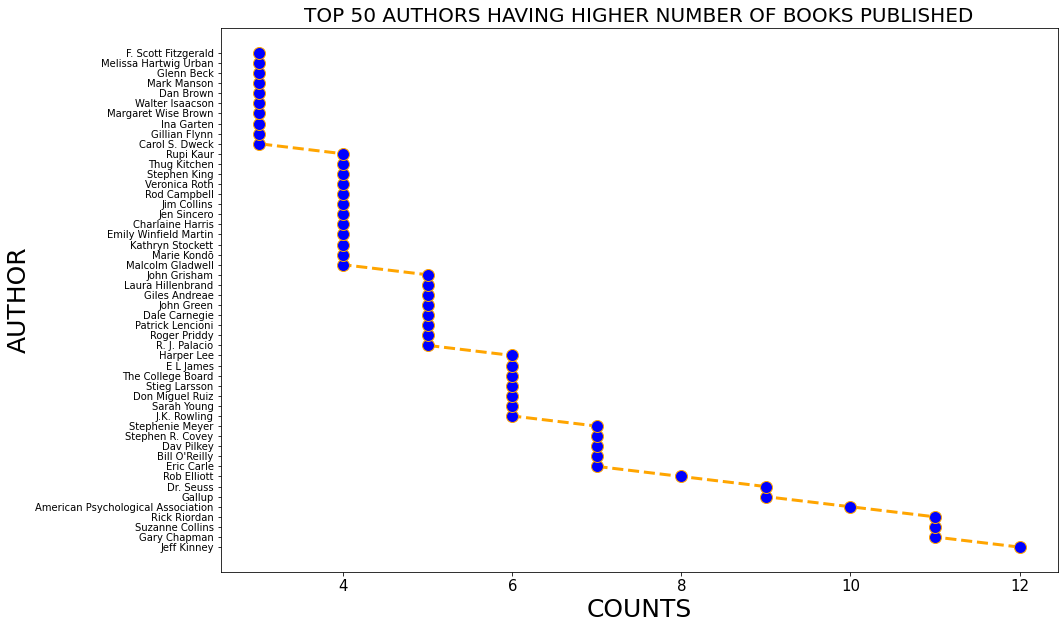

In [8]:
# Importing Matplotlib Library
from matplotlib import pyplot as plt 

# Creating Linear Plot with Customizations
fig = plt.figure(figsize =(15, 10)) 
plt.plot(atwo["Counts"], atwo["Author"], color='orange', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel("COUNTS", fontsize=25) 
plt.xticks(fontsize=15)
plt.ylabel("AUTHOR", fontsize=25) 
plt.yticks(fontsize=10)
plt.title("TOP 50 AUTHORS HAVING HIGHER NUMBER OF BOOKS PUBLISHED", fontsize=20)

# Displaying Linear Plot with Customizations
plt.show() 

# COUNTING THE DUPLICATES IN USER RATING COLUMN

In [9]:
# Counting the duplicates in User Rating column
ur = data.pivot_table(index = ['User Rating'], aggfunc ='size') 
ur = ur.reset_index()
ur.columns= ["User Rating", "Counts"]
print(ur)

    User Rating  Counts
0           3.3       1
1           3.6       1
2           3.8       2
3           3.9       3
4           4.0      14
5           4.1       6
6           4.2       8
7           4.3      25
8           4.4      38
9           4.5      60
10          4.6     105
11          4.7     108
12          4.8     127
13          4.9      52


# DISPLAYING DIFFERENT USER RATING VALUES IN DESCENDING ORDER

In [10]:
# Displaying Different User Rating Values in Descending Order 
urone = ur.nlargest(14, ["Counts"])
print(urone)

    User Rating  Counts
12          4.8     127
11          4.7     108
10          4.6     105
9           4.5      60
13          4.9      52
8           4.4      38
7           4.3      25
4           4.0      14
6           4.2       8
5           4.1       6
3           3.9       3
2           3.8       2
0           3.3       1
1           3.6       1


# VISUALIZATION OF DIFFERENT USER RATING VALUES AND THEIR COUNTS BY DONUT PLOT

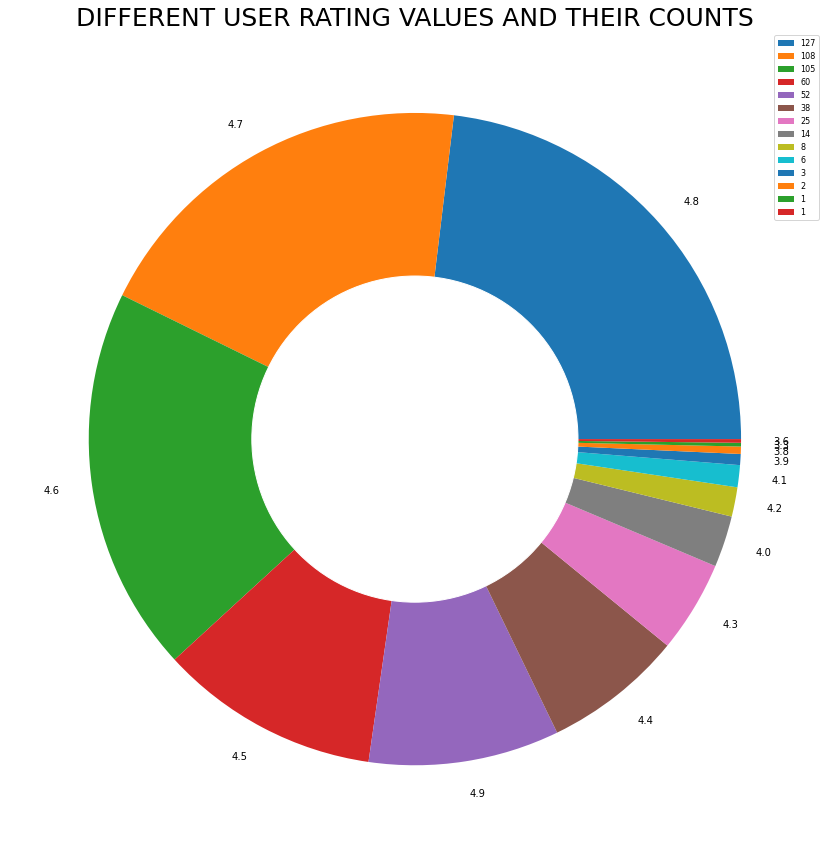

In [11]:
# Creating Donut Plot
fig = plt.figure(figsize =(15, 15)) 
circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(urone["Counts"], labels=urone["User Rating"])
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(urone["Counts"], fontsize=8)
plt.title("DIFFERENT USER RATING VALUES AND THEIR COUNTS",fontsize=25)

# Displaying Donut Plot
plt.show() 

# VISUALIZING DIFFERENT AUTHORS AND USER RATINGS FOR THEIR BOOKS BY SCATTER PLOT

In [12]:
# Creating Scatter Plot
fig = px.scatter(data, x='Author', y='User Rating', color='Author', title="DIFFERENT AUTHORS AND USER RATINGS FOR THEIR BOOKS")

# Displaying Scatter Plot
fig.show()

# COUNTING THE DUPLICATES IN PRICE COLUMN

In [13]:
# Counting the duplicates in Price column
p = data.pivot_table(index = ["Price"], aggfunc = 'size') 
p = p.reset_index()
p.columns= ["Price", "Counts"]
print(p)

    Price  Counts
0       0      12
1       1       1
2       2       5
3       3       1
4       4      32
5       5      36
6       6      38
7       7      23
8       8      52
9       9      38
10     10      28
11     11      35
12     12      27
13     13      29
14     14      30
15     15      21
16     16      20
17     17      19
18     18      14
19     19       4
20     20      17
21     21       9
22     22       6
23     23       5
24     24       5
25     25       2
26     27       4
27     28       6
28     30       5
29     32       2
30     36       1
31     39       1
32     40       5
33     42       1
34     46      10
35     52       1
36     53       1
37     54       1
38     82       1
39    105       2


# VISUALIZING VARIOUS BOOK PRICES AND THEIR NUMBER OF PUBLISHMENTS USING BAR CHART

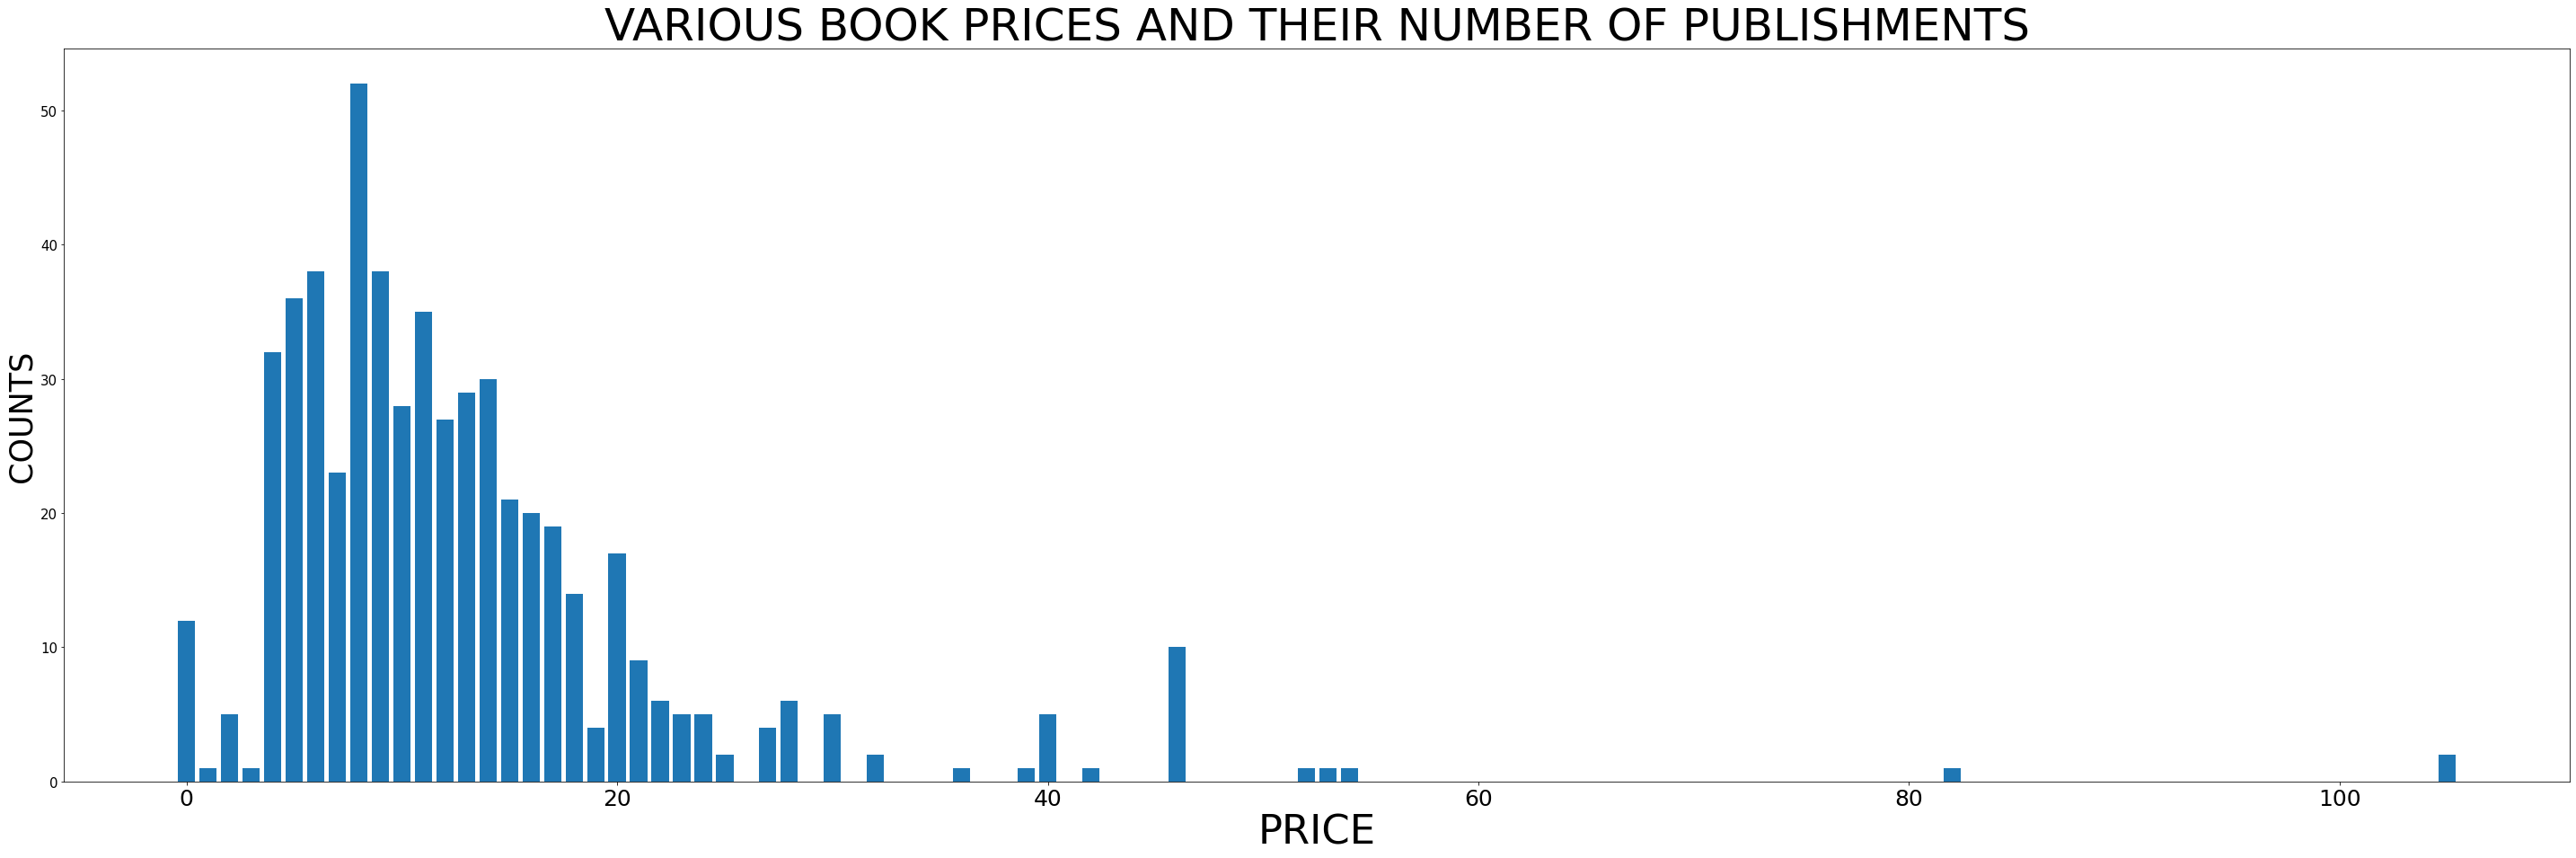

In [14]:
# Creating Bar Chart
fig = plt.figure(figsize =(50, 15)) 
plt.bar(p["Price"], p["Counts"]) 
plt.xlabel("PRICE", fontsize=45) 
plt.xticks(fontsize=25)
plt.ylabel("COUNTS", fontsize=35) 
plt.yticks(fontsize=15)
plt.title("VARIOUS BOOK PRICES AND THEIR NUMBER OF PUBLISHMENTS", fontsize=50)

# Displaying Bar Chart 
plt.show() 

# VISUALIZING DIFFERENT AUTHORS AND PRICE VALUES FOR THEIR BOOKS BY USING SCATTER PLOT

In [15]:
# Creating Scatter Plot
fig = px.scatter(data, x='Author', y='Price', color='Author', title="DIFFERENT AUTHORS AND PRICE VALUES FOR THEIR BOOKS")

# Displaying Scatter Plot
fig.show()

# VISUALIZING DIFFERENT AUTHORS WITH USER RATINGS AND PRICE VALUES OF THEIR BOOKS BY USING 3D SCATTER PLOT

In [16]:
# Creating 3D Scatter Plot
fig = px.scatter_3d(data, x='Author', y='User Rating', z='Price', color='Author', title="DIFFERENT AUTHORS WITH USER RATINGS AND PRICE VALUES OF THEIR BOOKS")

# Displaying 3D Scatter Plot
fig.show()

# COUNTING THE DUPLICATES IN YEAR COLUMN

In [17]:
# Counting the duplicates in Year column
y = data.pivot_table(index = ["Year"], aggfunc = 'size') 
y = y.reset_index()
y.columns= ["Year", "Counts"]
print(y)

    Year  Counts
0   2009      50
1   2010      50
2   2011      50
3   2012      50
4   2013      50
5   2014      50
6   2015      50
7   2016      50
8   2017      50
9   2018      50
10  2019      50


# VISUALIZING TOTAL NUMBER OF BOOKS PUBLISHED IN A YEAR USING PIE CHART

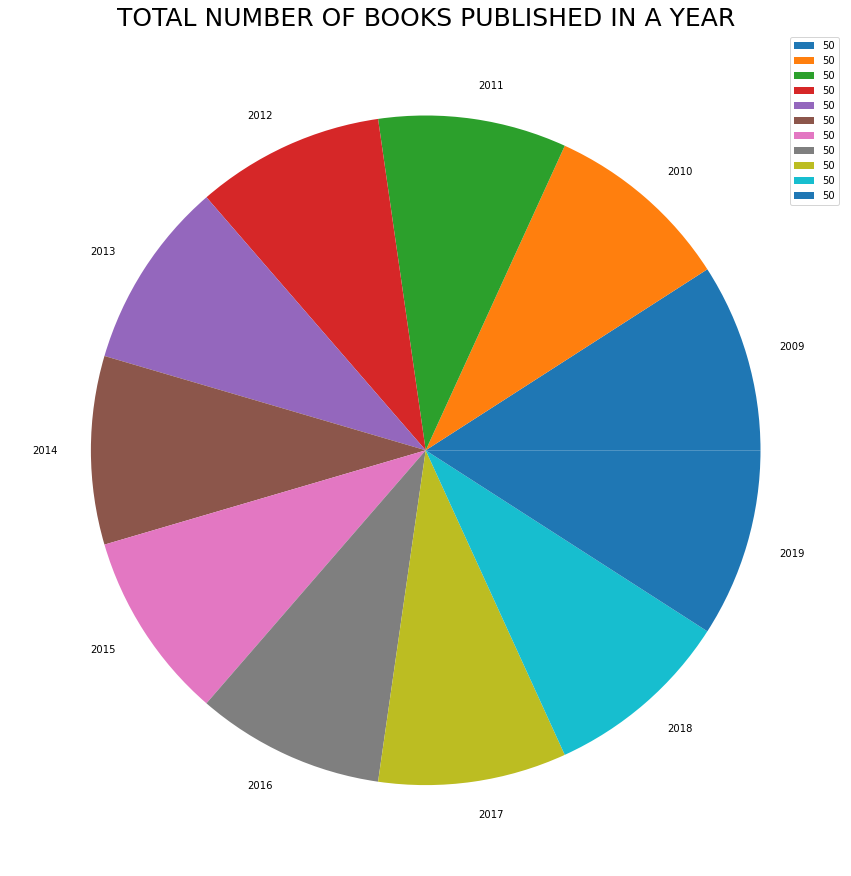

In [18]:
# Creating Pie Chart
fig = plt.figure(figsize =(15, 70)) 
plt.pie(y["Counts"], labels = y["Year"])
plt.legend(y["Counts"], fontsize=10)
plt.title("TOTAL NUMBER OF BOOKS PUBLISHED IN A YEAR", fontsize=25)

# Displaying Pie Chart 
plt.show() 

# VISUALIZING DIFFERENT AUTHORS WITH USER RATINGS, PRICE VALUES AND THE YEAR OF PUBLISHMENT OF THEIR BOOKS BY USING 3D SCATTER PLOT

In [19]:
# Creating 3D Scatter Plot
fig = px.scatter_3d(data, x='User Rating', y='Price', z='Year', color='Author', title="DIFFERENT AUTHORS WITH USER RATINGS, PRICE VALUES AND THE YEAR OF PUBLISHMENT OF THEIR BOOKS")

# Displaying 3D Scatter Plot
fig.show()

# COUNTING THE DUPLICATES IN GENRE COLUMN

In [20]:
# Counting the duplicates in Genre column
g = data.pivot_table(index = ["Genre"], aggfunc = 'size') 
g = g.reset_index()
g.columns= ["Year", "Counts"]
print(g)

          Year  Counts
0      Fiction     240
1  Non Fiction     310


# VISUALIZATION OF BOOK GENRES AND THEIR COUNTS BY DONUT PLOT

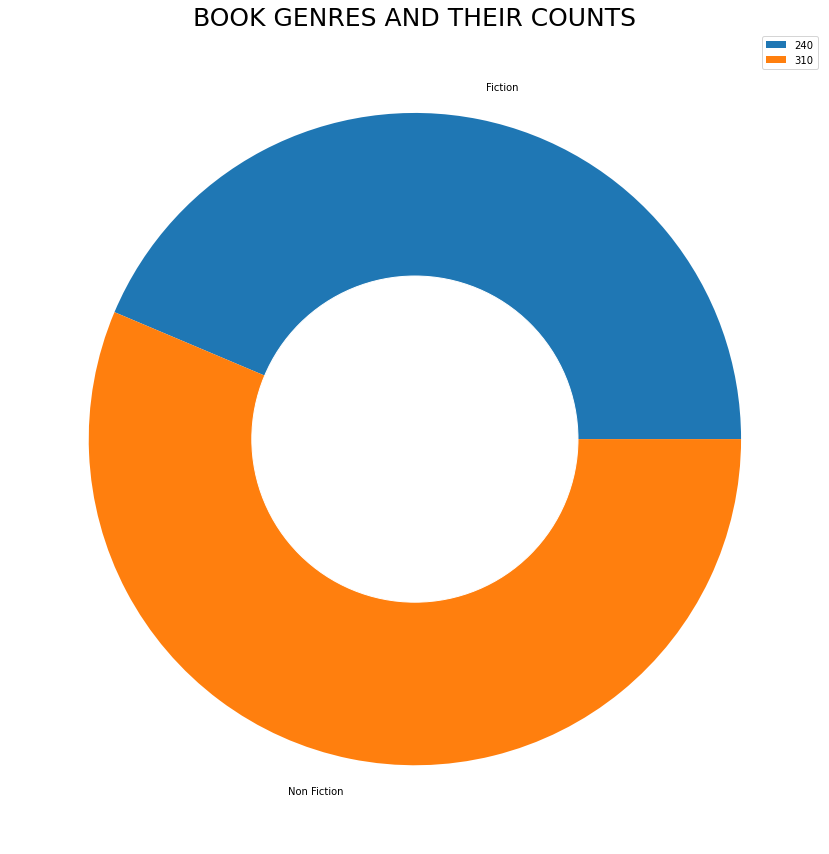

In [21]:
# Creating Donut Plot
fig = plt.figure(figsize =(15, 15)) 
circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(g["Counts"], labels=g["Year"])
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(g["Counts"])
plt.title("BOOK GENRES AND THEIR COUNTS", fontsize=25)

# Displaying Donut Plot
plt.show() 

# VISUALIZING DIFFERENT AUTHORS WITH USER RATINGS, TYPES OF GENRE AND PRICE VALUES OF THEIR BOOKS BY USING 3D SCATTER PLOT

In [22]:
# Creating 3D Scatter Plot
fig = px.scatter_3d(data, x='Genre', y='User Rating', z='Price', color='Author', title="DIFFERENT AUTHORS WITH USER RATINGS, TYPES OF GENRE AND PRICE VALUES OF THEIR BOOKS")

# Displaying 3D Scatter Plot
fig.show()

# VISUALIZING RELATIONSHIP BETWEEN USER RATINGS, TYPES OF GENRE, PRICE VALUES AND THE PUBLISHMENT OF THE BOOKS BY USING 3D SCATTER PLOT

In [23]:
# Creating 3D Scatter Plot
fig = px.scatter_3d(data, x='Year', y='User Rating', z='Price', color='Genre', title="RELATIONSHIP BETWEEN USER RATINGS, TYPES OF GENRE, PRICE VALUES AND THE PUBLISHMENT OF THE BOOKS")

# Displaying 3D Scatter Plot
fig.show()

# VISUALIZING DIFFERENT AUTHORS WITH YEARS OF BOOK PUBLISHMENT AND TYPES OF BOOK GENRE BY USING 3D SCATTER PLOT

In [24]:
# Creating 3D Scatter Plot
fig = px.scatter_3d(data, x='Year', y='Genre', z='Author', color='Author', title="DIFFERENT AUTHORS WITH YEARS OF BOOK PUBLISHMENT AND TYPES OF BOOK GENRE")

# Displaying 3D Scatter Plot
fig.show()

# SPLITTING INPUT AND TARGET FEATURES

In [25]:
# Input Features
x = data.drop(columns=["Genre"])
print(x)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year  
0                    JJ Smith          4.7    17350      8  2016  
1                Stephen King          4.6     2052     22  2011  
2          Jordan B. Peterson          4.7    18979     15  2018  
3               George Orwell      

In [26]:
# Output features
y = data[["Genre"]]
print(y)

           Genre
0    Non Fiction
1        Fiction
2    Non Fiction
3        Fiction
4    Non Fiction
..           ...
545      Fiction
546  Non Fiction
547  Non Fiction
548  Non Fiction
549  Non Fiction

[550 rows x 1 columns]


# LABEL ENCODING

In [27]:
# Input Features - Label Encoding
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
x = x.apply(le.fit_transform)
print(x)

     Name  Author  User Rating  Reviews  Price  Year
0       0     114           11      291      8     7
1       1     219           10       52     22     2
2       2     134           11      296     15     9
3       3      95           11      304      6     8
4       4     174           12      196     12    10
..    ...     ...          ...      ...    ...   ...
545   349     120           13      230      8    10
546   350     121           11      277      8     7
547   350     121           11      277      8     8
548   350     121           11      277      8     9
549   350     121           11      277      8    10

[550 rows x 6 columns]


In [28]:
# Output Features - Label Encoding
y = le.fit_transform(y) 
y = y.ravel()
print(y)

[1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# TRAIN-TEST SPLIT

In [29]:
# Train - Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# TRAINING ML MODEL AND FINDING ITS ACCURACY

In [30]:
# Training ML model and Finding its accuracy
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_clf = clf.predict(x_test)
from sklearn.metrics import accuracy_score
print("Decision Tree Classifier Accuracy : ",accuracy_score(y_test, y_clf))

Decision Tree Classifier Accuracy :  0.793939393939394


In [31]:
# Training ML model and Finding its accuracy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100, criterion='gini')
rfc.fit(x_train, y_train)
y_rfc = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
print("Random Forest Classifier Accuracy : ", accuracy_score(y_test, y_rfc))

Random Forest Classifier Accuracy :  0.8606060606060606
